<a href="https://colab.research.google.com/github/youngseo21/esaa_22/blob/main/assignment_101422_datetime(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# import package
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime

import warnings  
warnings.filterwarnings(action='ignore')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### | **datetime 오브젝트로 변환하기 - to_datetime 메서드**
___
- 문자열은 시간 계산을 할 수 없기 때문에 datetime 오브젝트로 변환해 주어야 한다.
- `to_datetime` 메서드를 사용하여 문자열을 datetime 오브젝트로 변환할 수 있다.

#### [실습] 문자열을 datetime 오브젝트로 변환하기
___

##### 1. ebola 데이터셋 불러오기

In [14]:
ebola = pd.read_csv('/content/drive/MyDrive/esaa/country_timeseries.csv')

##### 2. ebola 데이터프레임 Column의 자료형 확인하기

In [15]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

##### 3. to_datetime 메서드를 사용하여 Date 열의 자료형을 datetime 오브젝트로 변환

In [16]:
# 자료형을 datetime 오브젝트로 변환하여 새로운 Column에 저장
ebola['date_dt'] = pd.to_datetime(ebola['Date']) 
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

##### 4. to_datetime 메서드에서 `format` 인자를 통해 시간 형식 지정하기

In [17]:
# 테스트용 데이터프레임
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']}) # 딕셔너리로 데이터프레임 생성

# 시간 형식 지정
test_df1['date_dtl'] = pd.to_datetime(test_df1['order_day'], format = '%d/%m/%y') # data가 일/월/2자리 연도 순이라는 의미
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format = '%m/%d/%y') # data가 월/일/2자리 연도 순이라는 의미
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format = '%y/%m/%d') # data가 2자리 연도/월/일 순이라는 의미

# 출력
print(test_df1)

  order_day   date_dtl   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [18]:
# 테스트용 데이터프레임
test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']}) # 딕셔너리로 데이터프레임 생성

# 시간 형식 지정
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format = '%d-%m-%y') # data가 날짜-월-연도 순이라는 의미

# 출력
print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


### | **시간 형식 지정자**
___
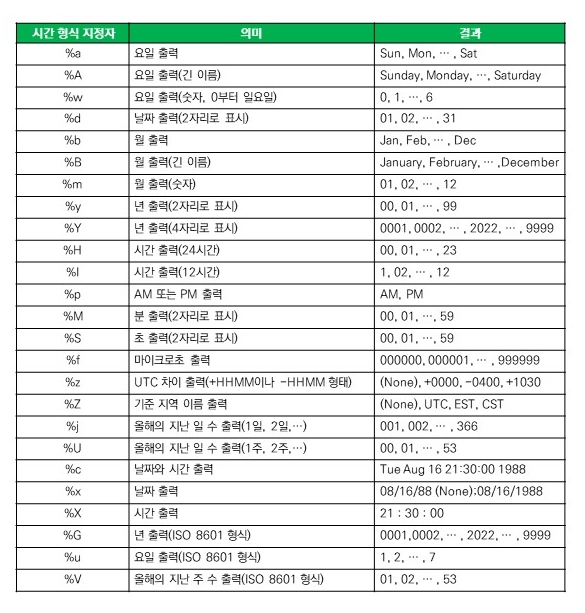

#### 시계열 데이터를 구분해서 추출하기
___
- now 메서드로 얻은 현재 시간의 시계열 데이터는 아주 정밀한 단위까지 시간을 표현
- 하지만 원하는 시계열 데이터의 시간 요소가, 연도, 월, 일이라면 now 메서드로 얻은 시계열 데이터를 잘라내야 한다.
- `strftime` 메서드와 시간 형식 지정자를 이용하여 시계열 데이터를 잘라낼 수 있다.

In [10]:
# now 메서드로 시간의 시계열 데이터 얻기
now = datetime.now( ) 
print(now)

2022-10-14 06:10:02.781369


In [11]:
# strftime 메서드로 원하는 시간 요소만 얻기 : 연도-월-일
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2022-10-14


In [19]:
# strftime 메서드로 원하는 시간 요소만 얻기 : 시-분-초
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

06:10:02


In [20]:
# strftime 메서드로 원하는 시간 요소만 얻기 : 연도-월-일 시-분-초
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2022-10-14 06:10:02


### | **datetime 오브젝트로 번환하기 一 read_csv 메서드**
___
- `read_csv` 메서드에서 datetime 오브젝트로 변환하려는 열을 지정하여 데이터셋을 불러올 수 있다.
- `parse_dates` 인자로 datetime 오브젝트로 변환하고자 하는 열의 이름 지정하면 된다.

#### [실습] datetime 오브젝트로 번환하려는 열을 지정하여 데이터셋 불러오기
___


In [21]:
ebola1 = pd.read_csv('/content/drive/MyDrive/esaa/country_timeseries.csv', parse_dates = ['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

### | **datetime 오브젝트에서 날짜 정보 추출하기**
___
- datetime 오브젝트는 연도, 월, 일과 같은 날짜 정보를 따로 저장하고 있는 속성을 가지고 있다.
- 이를 통해 날짜 정보를 하나씩 추출할 수 있다.

#### [실습] datetime 오브젝트에서 날짜 정보 추출하기
___

##### 1. 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환

In [22]:
# 날짜 정보를 가지고 있는 시리즈 생성
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])

# datetime 오브젝트로 변환
d1 = pd.to_datetime(date_series) 
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


##### 2. datetime 오브젝트의 year, month, day 속성을 이용하여 년, 월, 일 정보를 추출

In [23]:
# year
print(d1[0].year)

# month
print(d1[0].month)

# day
print(d1[0].day)

2018
5
16


### | **dt 접근자 사용하기**
___
- 문자열의 str 접근자처럼, dt 접근자률 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있다.

#### [실습] dt 접근자로 시계열 데이터 정리하기

##### 1. ebola 데이터셋을 불러온 후, Date 열을 datetime 오브젝트로 변환하여 새로운 열로 추가

In [24]:
ebola = pd.read_csv('/content/drive/MyDrive/esaa/country_timeseries.csv')

# datetime 오브젝트로 변환
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

##### 2. dt 접근자를 사용하지 않고 인덱스가 3인 데이터의 연도, 월, 일 데이터 추출

In [25]:
print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [26]:
# 연도 데이터 추출
print(ebola['date_dt'][3].year)

# 월 데이터 추출
print(ebola['date_dt'][3].month)

# 일 데이터 추출
print(ebola['date_dt'][3].day)

2015
1
2


##### 3. dt 접근자로 date_dt 열에 접근하여 연도 데이터 추출하기

In [27]:
ebola['year'] = ebola['date_dt'].dt.year # dt 접근자 사용
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


##### 4. dt 접근자로 date_dt 열에 접근하여 한 번에 월, 일 데이터 추출하기

In [28]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)# dt 접근자 사용
print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


##### 5. date_dt, year, month, day 열의 자료형 출력

In [29]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

### | **에볼라 최초 발병일 계산하기**
___

In [30]:
# ebola 데이터 프레임 생성
ebola = pd.read_csv('/content/drive/MyDrive/esaa/country_timeseries.csv')

##### 1. ebola 데이터프레임의 마지막 행과 열 살펴보기
- 시간 역순으로 데이터가 정렬되어 있다.
- 따라서 시간 순으로 데이터를 살펴보려면 데이터프레임의 마지막부터 살펴봐야 한다.

In [31]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


##### 2. min 메서드를 사용하여 에볼라의 최초 발병일 찾기
- 위의 결과에서 121행을 보면 에볼라의 최초 발병일이 2014년 3월 22일인 것을 알 수 있다.
- `min` 메서드를 사용해서도 에볼라의 최초 발병일을 찾을 수 있다.

In [32]:
# datetime 오브젝트로 변환
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

# min 메서드 사용
print(ebola['date_dt'].min()) 
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


##### 3. 에볼라의 진행 정도 확인하기
- Date 열에서 에볼라의 최초 발병일을 빼면 에볼라의 진행 정도를 알 수 있다.
- 사실 ebola 데이터 프레임의 Day 열에는 이 값(에볼라의 진행 정도)가 저장되어 있다.

In [33]:
# 에볼라의 진행 정도 확인하기
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()

# Day 열과 직접 구한 에볼라의 진행 정도 비교
print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


### | **파산한 은행의 개수 계산하기**
___

##### 1. 파산한 은행 데이터셋을 불러오고 데이터 살펴보기
- 데이터셋을 살펴보면 Closing Date, Updated Date 열의 데이터 자료형이 시계열 데이터인 것을 알 수 있다.

In [35]:
banks = pd.read_csv('https://raw.githubusercontent.com/easysIT/doit_pandas/master/data/banklist.csv')
print(banks.head()) 

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


##### 2. Closing Date, Updated Date 열 데이터의 자료형을 확인하고, datetime 오브젝트로 변환하기
- Closing Date, Updated Date 열 데이터의 자료형은 **object**이다.
- 따라서 datetime 오브젝트로 변환해야 한다. `read_csv` 메서드의 `parse_dates` 인자를 이용할 것이다.

In [36]:
banks_no_dates = pd.read_csv('https://raw.githubusercontent.com/easysIT/doit_pandas/master/data/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [37]:
# datetime 오브젝트로 변환
banks= pd.read_csv('https://raw.githubusercontent.com/easysIT/doit_pandas/master/data/banklist.csv', parse_dates = [5, 6]) # 5, 6번째 Column을 Datetime으로
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


##### 3. dt 접근자와 quarter 속성을 이용하여 은행이 파산한 연도와 분기 구하기

In [38]:
# dt 접근자 중 'year'을 활용해 파산한 연도 추출
# quarter 속성으로 파산한 분기 추출
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

##### 4. 연도별 파산한 은행 개수
- `groupby` 메서드를 사용하여 연도별로 파산한 은행의 개수를 구할 수 있다.

In [39]:
closing_year = banks.groupby(['closing_year']).size() 
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


##### 5. 각 연도별, 분기별 파산한 은행 개수

In [40]:
# 연도별로 그룹화한 다옴 다시 분기별로 그룹화
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size( ) 
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

##### 6. 그래프 그리기

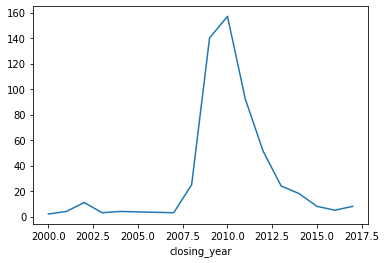

In [41]:
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

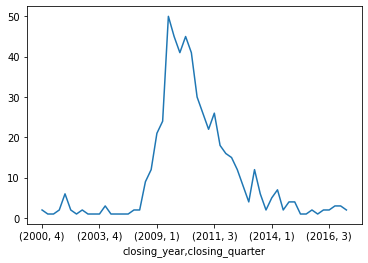

In [42]:
fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

### | **시간 범위 수정하고 데이터 밀어내기**
___

#### [실습] 에볼라의 확산 속도 비교하기

In [43]:
# ebola 데이터 프레임 생성
ebola = pd.read_csv('/content/drive/MyDrive/esaa/country_timeseries.csv', parse_dates = ['Date'])

##### 1. Date 열을 인덱스로 지정하고, Date와 사망자 수에 대한 그래프 그리기
- ebola 데이터프레임에서 Date 열을 인덱스로 지정한다.
- x축을 Date 열, y축을 사망자 수로 하는 그래프를 그린다.

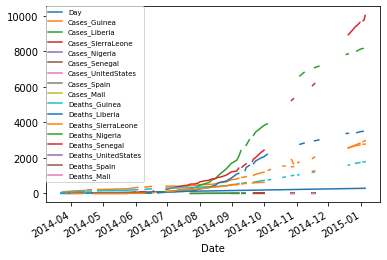

In [44]:
# Date 열을 인덱스로 지정
ebola.index = ebola['Date']

# Date와 사망자 수에 대한 그래프 그리기
fig, ax = plt.subplots( )
ax = ebola.iloc[0:,1:].plot(ax = ax)
ax.legend(fontsize=7, loc=2, borderaxespad = 0.)
plt.show()

##### 2. 정확한 나라별 에볼라 확산 속도 비교를 위해 각 나라의 발병일 위치 이동하기
- 발병일이 달라 그래프가 그려지기 시작한 지점이 다르다.
- 이렇게 되면 정확하게 에볼라의 확산 속도를 비교할 수 없다.
- 각 나라의 발병일을 가장 처음 에볼라가 발병한 Guinea과 같은 날짜로 이동하여 그래프의 시작점을 동일하게 설정한다.

In [45]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


##### 3. 그래프를 그리기 위한 데이터 프레임 준비
- ebola 데이터 프레임을 확인하면 중간에 아예 날짜가 없는 데이터(ex. 2015-01-01)가 존재한다.
- 이러한 데이터도 포함시켜야 확산 속도를 제대로 비교할 수 있다.

In [46]:
ebola = pd.read_csv('/content/drive/MyDrive/esaa/country_timeseries.csv', parse_dates = ['Date'])
print(ebola.head().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


##### 4. 시간 범위를 생성하여 new index에 저장
- ebola 데이터프레임의 Date 열의 최댓값과 최솟값으로 시간 범위를 생성했다.
- 이 시간 범위를 새로운 index로 지정하면 날짜가 아예 없었던 데이터의 인덱스를 생성할 수 있다. 

In [47]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

##### 5.  reversed 메서드로 인덱스를 시간 순서대로 정렬
- `new_idx`를 출력하면 ebola 데이터셋에 있는 시간 순서와 반대로 생성되어 있다.
- 따라서 시간 순서를 맞추기 위해 인덱스를 반대로 뒤집어야 한다.

In [48]:
# new_idx 확인하기
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [49]:
new_idx = reversed(new_idx)

##### 6. 새로 생성한 인덱스를 새로운 인덱스로 지정하기
- 새로 생성한 인덱스를 인덱스로 새로 지정하면 ebola 데이터프레임에 원래 없던 날짜가 추가된다.
- 이때 누락값은 NaT에 해당한다.

In [50]:
ebola = ebola.reindex(new_idx) 
print(ebola.head().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [ ]:
print(ebola.tail().iloc[:,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


##### 7. 각 나라의 에볼라 발병일을 구하기
- `last_valid_index`, `first_valid_index` 메서드를 사용하여 각 나라의 에볼라 발병일을 구한다.
- 각 메서드는 유효한 값이 있는 마지막, 첫 번째 인덱스를 출력한다.

In [51]:
# 각 나라의 에볼라 발병일 last_valid
last_valid = ebola.apply(pd.Series.last_valid_index) 
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [52]:
first_valid = ebola.apply(pd.Series.first_valid_index) 
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


##### 8. 각 나라의 발병일을 이동할 간격인 shift_values 구하기
- 에볼라가 가장 처음 발병한 날(earliest_date)에서 각 나라의 에볼라 발병일을 뺀 만큼 옮기면 각 나라의 에볼라 발병일을 동일한 출발선으로 옮길 수 있다.
- 따라서 shift_valuse = 각 나라의 에볼라 발병일 - earliest_date

In [53]:
# 에볼라가 가장 처음 발병한 날 구하기
earliest_date = ebola.index.min( ) 
print(earliest_date)

2014-03-22 00:00:00


In [54]:
# shift_vaules 구하기
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


##### 9. 각 나라의 에볼라 발병일 옮기기
- `shift` 메서드를 사용하여 모든 열의 값을 shift_values 값만큼 이동한다.
- `shift` 메서드 : 인자에 설정한 값만큼 데이터를 밀어낸다.

In [55]:
# 시간을 다시 설정한 데이터를 담을 딕셔너리
ebola_dict = {}

for idx, col in enumerate(ebola):
  # 위의 n days의 n 값을 d에 저장 
  d = shift_values[idx].days 
  # 데이터 이동
  shifted = ebola[col].shift(d) 
  # 이동한 값을 딕셔너리에 저장
  ebola_dict[col] = shifted 

##### 10. ebola_dict을 데이터프레임으로 변환

In [57]:
ebola_shift = pd.DataFrame(ebola_dict)

###### 11. 에볼라의 최초 발병일을 기준으로 옮겨진 데이터 확인

In [58]:
print(ebola_shift.tail( ))

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

###### 12. 인덱스를 Day 열로 지정하고, 그래프에 필요없는 열(Date, Day) 삭제

In [59]:
# 인덱스 지정
ebola_shift.index = ebola_shift['Day']
#  그래프에 필요없는 열(Date, Day) 삭제
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis = 1)

# 데이터프레임 확인
print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

##### 13. 그래프 그리기

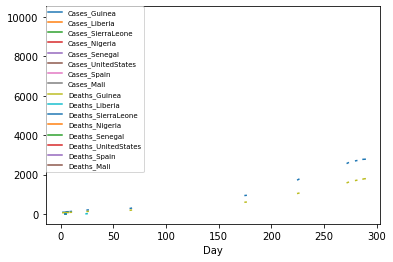

In [60]:
fig, ax = plt.subplots() 
ax = ebola_shift.iloc[:,:].plot(ax = ax) 
ax.legend(fontsize = 7, loc = 2, borderaxespad = 0.)
plt.show()